Importing packages and the data im going to be using.

In [27]:
# !pip install gdown
# !pip install bkmeans

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from bkmeans import BKMeans
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy
os.environ["OMP_NUM_THREADS"] = '1'
warnings.filterwarnings('ignore')

In [29]:
!gdown 14o_567wHMaiXsriJhgXQLdUU0r5OnMnD
df = pd.read_csv('customer.csv')
print(df.shape)
print(df.isna().sum())
df.head()

(200, 5)
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Downloading...
From: https://drive.google.com/uc?id=14o_567wHMaiXsriJhgXQLdUU0r5OnMnD
To: C:\Users\Parsian 32236475\Desktop\cwd\customer.csv

  0%|          | 0.00/3.98k [00:00<?, ?B/s]
100%|##########| 3.98k/3.98k [00:00<00:00, 4.04MB/s]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


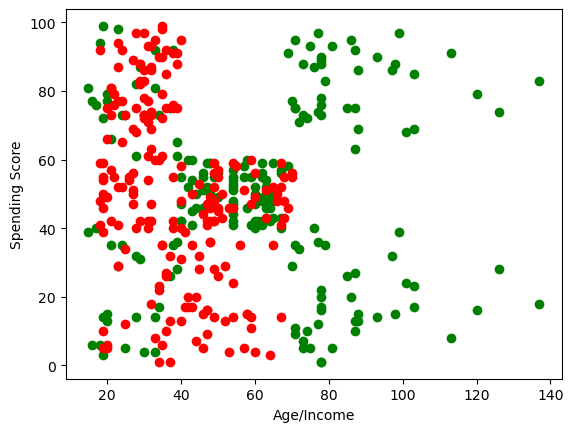

In [31]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c='g')
plt.scatter(df['Age'],df['Spending Score (1-100)'],c='r')
plt.ylabel('Spending Score')
plt.xlabel('Age/Income')
plt.show()

In [32]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0}) # encoding Gender column
x = df.drop('CustomerID',axis=1)

In [33]:
km = KMeans(n_clusters=4,init='k-means++',n_init=13) # fitting the data on the model with 3 as the number of clusters and getting labels
km.fit(x)
label = km.predict(x)

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


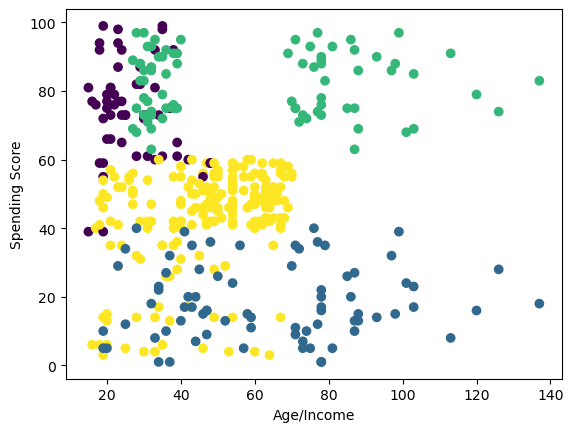

In [34]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=label,cmap='viridis')
plt.scatter(df['Age'],df['Spending Score (1-100)'],c=label,cmap='viridis')
plt.ylabel('Spending Score')
plt.xlabel('Age/Income')
plt.show()

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\A

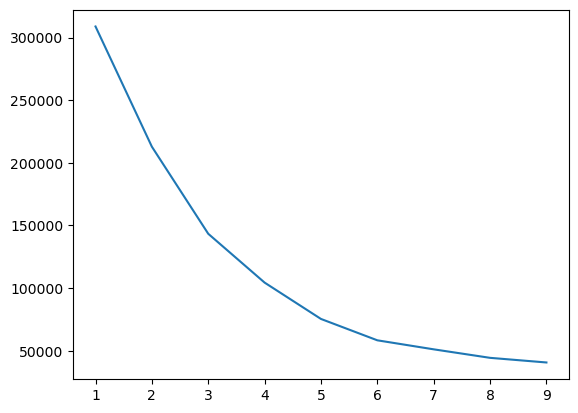

In [35]:
# using the elbow method to determine what number of clusters i should be using.
wcss = []
for i in range(1,10):
  kml = KMeans(n_clusters=i)
  kml.fit(x)
  wcss.append(kml.inertia_)
plt.plot(range(1,10),wcss)

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

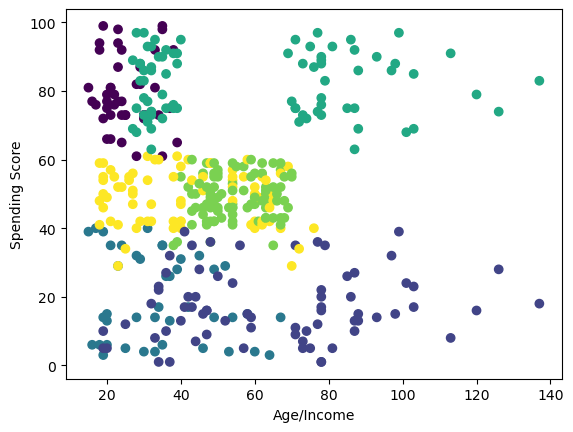

In [36]:
bkm = BKMeans(n_clusters=6, n_init=13) # Using breathing K-means method, as it's faster and better at performing
bkm.fit(x)
label2 = bkm.predict(x)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=label2,cmap='viridis')
plt.scatter(df['Age'],df['Spending Score (1-100)'],c=label2,cmap='viridis')
plt.ylabel('Spending Score')
plt.xlabel('Age/Income')
plt.show()

Applying Agglomerative clustering to the data

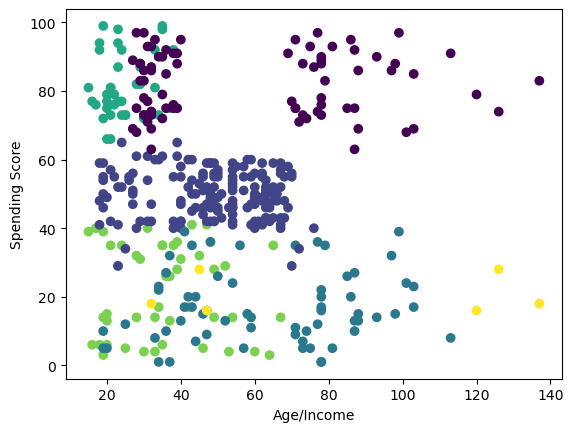

In [37]:
agglom = AgglomerativeClustering(linkage = 'average', n_clusters=6, metric='euclidean')
agglopred = agglom.fit_predict(x)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=agglopred,cmap='viridis')
plt.scatter(df['Age'],df['Spending Score (1-100)'],c=agglopred,cmap='viridis')
plt.ylabel('Spending Score')
plt.xlabel('Age/Income')
plt.show()

In [38]:
x_min, x_max = np.min(x, axis=0), np.max(x, axis=0) # normalizing the data and getting it's distance matrix to plot a dendrogram.
X1 = (x - x_min) / (x_max - x_min)

dist_matrix = distance_matrix(X1,X1)

C:\Users\Parsian 32236475\AppData\Local\Temp\ipykernel_3252\850864696.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


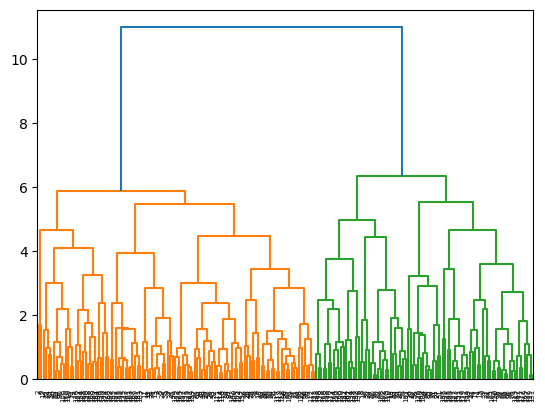

In [39]:
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)